In [1]:
import os
import librosa
import pandas as pd
import numpy as np

from IPython.display import Audio

import warnings
warnings.filterwarnings("ignore")

In [2]:
crema = '/kaggle/input/cremad/AudioWAV'
ravdess = '/kaggle/input/ravdess-emotional-speech-audio'
savee = '/kaggle/input/savee-database/AudioData'
tess = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'

In [3]:
def load_crema(path):
    audio_files = os.listdir(path)
    mappings = {
        'ANG' : 'Angry',
        'DIS' : 'Disgust',
        'FEA' : 'Fear',
        'HAP' : 'Happy',
        'NEU' : 'Neutral',
        'SAD' : 'Sad'
    }
    
    audio_paths = [os.path.join(path, file) for file in audio_files]
    emotions = [mappings[file.split('_')[2]] for file in audio_files]

    df = pd.DataFrame({'Paths':audio_paths, 'Emotions':emotions})
    
    return df

In [4]:
def load_ravdess(path):
    actors = os.listdir(path)
    actors = [actor for actor in actors if actor != 'audio_speech_actors_01-24']
    mappings = {
        '01' : 'Neutral',
        '02' : 'Neutral',
        '03' : 'Happy',
        '04' : 'Sad',
        '05' : 'Angry',
        '06' : 'Fear',
        '07' : 'Disgust',
        '08' : 'Surprised'
    }
    
    audio_paths = []
    
    for actor in actors:
        files = os.listdir(os.path.join(path, actor))
        for file in files:
            audio_paths.append(os.path.join(path, actor, file))
    emotions = [mappings[file.split('/')[-1].split('-')[2]] for file in audio_paths]
    
    df = pd.DataFrame({'Paths':audio_paths, 'Emotions':emotions})
    
    return df
    

In [5]:
def load_savee(path):
    speakers = os.listdir(path)
    speakers = [speaker for speaker in speakers if speaker != 'Info.txt']
    mappings = {
        'a' : 'Angry',
        'd' : 'Disgust',
        'f' : 'Fear',
        'h' : 'Happy',
        'n' : 'Neutral',
        'sa' : 'Sad',
        'su' : 'Surprised'
    }
    
    audio_paths = []
    for speaker in speakers:
        files = os.listdir(os.path.join(path, speaker))
        for file in files:
            audio_paths.append(os.path.join(path, speaker, file))
            
    emotions = [mappings[file.split('/')[-1][0]] if file.split('/')[-1][1].isnumeric() else mappings[file.split('/')[-1][:2]] for file in audio_paths]
    
    df = pd.DataFrame({'Paths':audio_paths, 'Emotions':emotions})
    
    return df
    

In [6]:
def load_tess(path):
    emotion_paths = os.listdir(path)
    
    audio_paths = []
    emotions = []
    
    for folder in emotion_paths:
        emotion = folder.split('_')[-1].capitalize()
        if emotion == 'Surprise':
            emotion = 'Surprised'
        for file in os.listdir(os.path.join(path, folder)):
            file_path = os.path.join(path, folder, file)
            audio_paths.append(file_path)
            emotions.append(emotion)
        
    df = pd.DataFrame({'Paths':audio_paths, 'Emotions':emotions})
    
    return df
        

In [7]:
crema_df = load_crema(crema)
ravdess_df = load_ravdess(ravdess)
savee_df = load_savee(savee)
tess_df = load_tess(tess)

In [8]:
data = pd.concat([crema_df, ravdess_df, savee_df, tess_df],axis=0)
data.head(5)

,Paths,Emotions
0,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav,Disgust
1,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav,Happy
2,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav,Happy
3,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav,Disgust
4,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav,Disgust


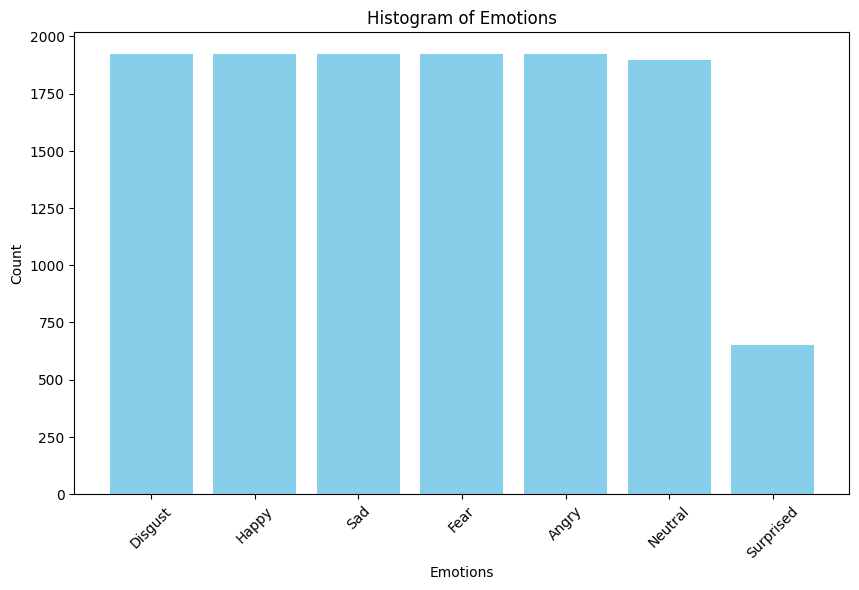

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of each emotion
emotion_counts = data['Emotions'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Histogram of Emotions')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


### Data Augmentation
1. Add Noise
2. Add Pitch And Speed Adjustments
3. Time Shifting
4. Volume Scaling

In [10]:
def noise(data):
    noise_amp = 0.03*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def volume(data):
    volume_factor = np.random.uniform(0.5, 1.5)
    adjusted_audio = data * volume_factor
    adjusted_audio = np.clip(adjusted_audio, -1, 1)
    return adjusted_audio


def stretch(data, r):
    r = librosa.get_duration(y=data,sr=r)
    r = 5/r
    return librosa.effects.time_stretch(data, rate = r)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, ns = 10):
    return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = ns)


In [11]:
path = np.array(data.Paths)[1]
audio, sample_rate = librosa.load(path)

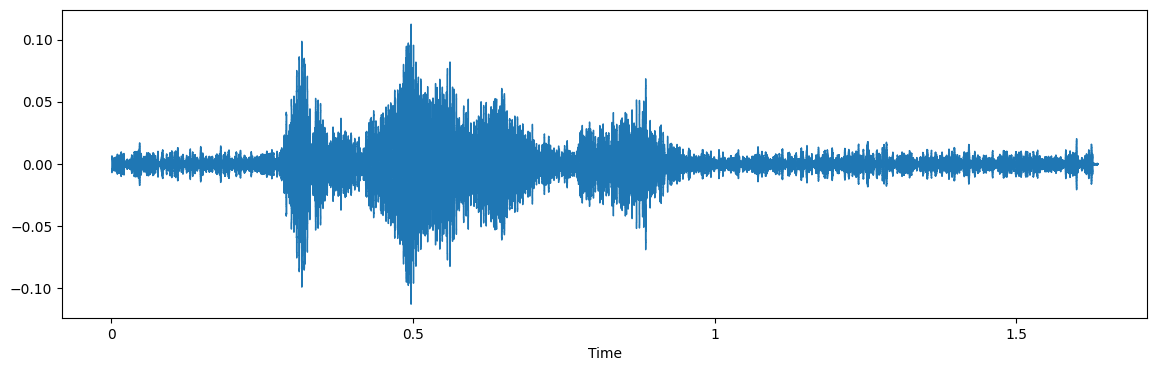

In [12]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=audio, sr=sample_rate)
Audio(path)

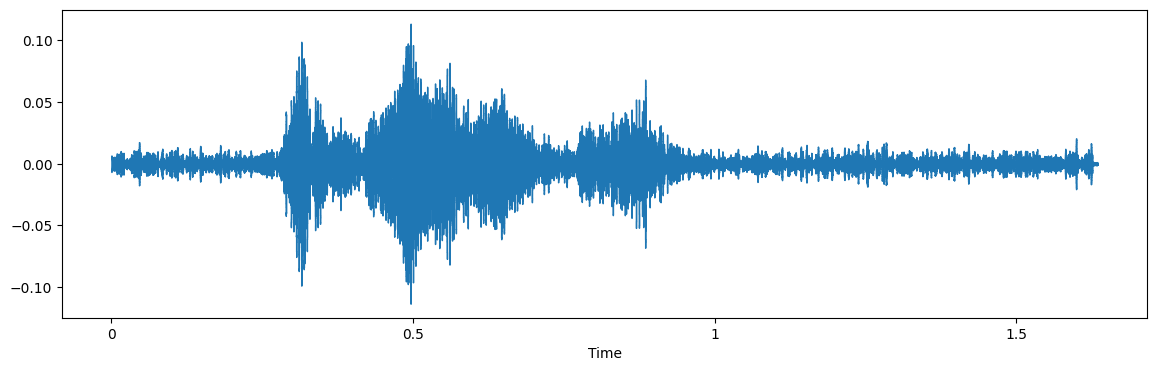

In [13]:
x = noise(audio)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

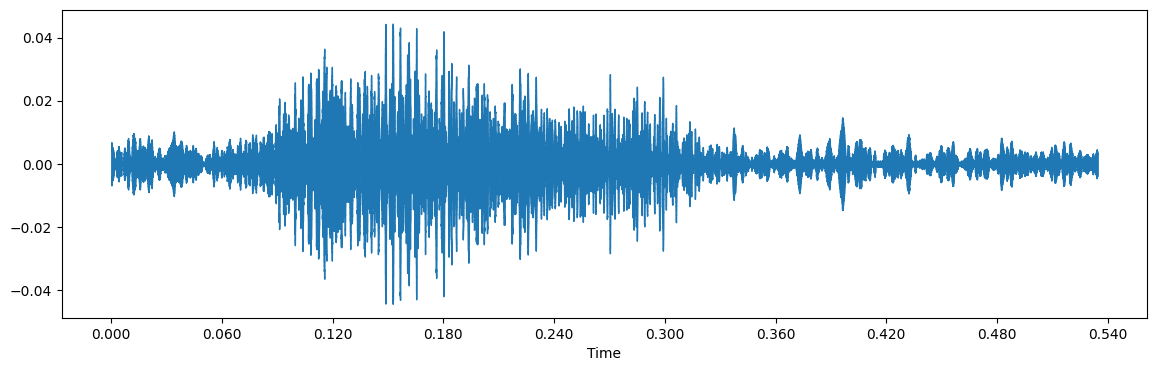

In [14]:
x = stretch(audio, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

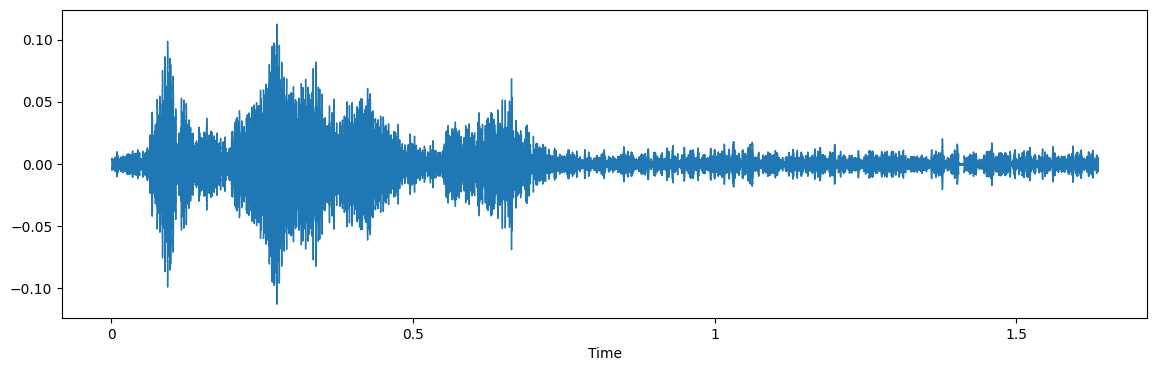

In [15]:
x = shift(audio)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

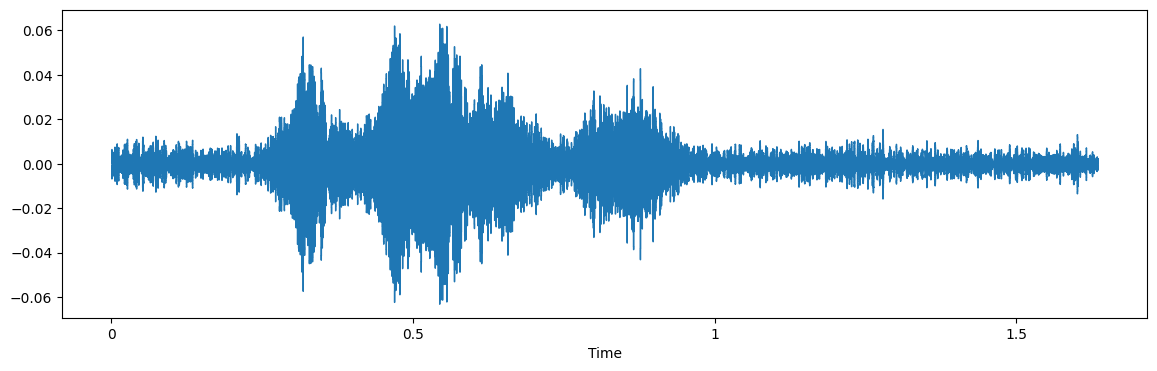

In [16]:
x = pitch(audio, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

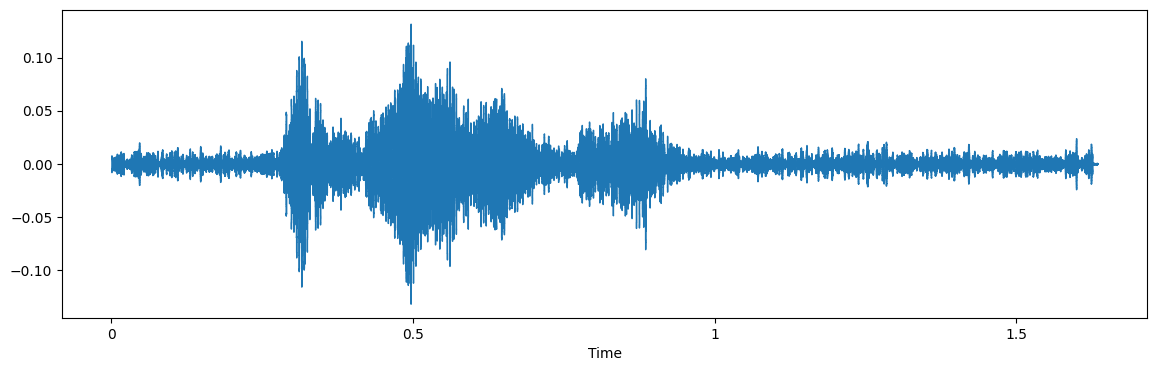

In [17]:
x = volume(audio)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [18]:
def apply_random_augmentations(audio, sr):
    augmentations = [
        lambda x: noise(x),
        lambda x: volume(x),
        lambda x: stretch(x, sr),
        lambda x: shift(x),
        lambda x: pitch(x, sr)
    ]
    
    # Randomly choose the number of augmentations to apply (at least one)
    num_augmentations = np.random.randint(1, len(augmentations) + 1)
    
    # Randomly shuffle and select augmentations
    chosen_augmentations = np.random.choice(augmentations, num_augmentations, replace=False)
    
    # Apply each chosen augmentation
    augmented_audio = audio
    for augmentation in chosen_augmentations:
        augmented_audio = augmentation(augmented_audio)
    
    return augmented_audio

In [21]:
def get_features(audio_path):
    # Load the audio file
    audio, sr = librosa.load(audio_path, duration=2.5, offset=0.6)
#     audio = apply_random_augmentations(audio, sr)
    
    # 1. Chroma feature
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    # 2. Mel-frequency cepstral coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # 3. Spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    
    # 4. Tonnetz (tonnetz features)
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
    
    # 5. Zero crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
    
    # 6. Root Mean Square (RMS)
    rms = librosa.feature.rms(y=audio)
    
    # Flatten features and concatenate
    features = np.concatenate([
        np.mean(chroma, axis=1),
        np.mean(mfccs, axis=1),
        np.mean(spectral_contrast, axis=1),
        np.mean(tonnetz, axis=1),
        np.mean(zero_crossing_rate, axis=1),
        np.mean(rms, axis=1)
    ])
    
    return features

In [22]:
def extract_mel_spectrogram(file_path, n_mels=128, sr=22050, duration=2.5, offset=0.6, target_length=80):
    # Load the audio file with a specific duration and offset
    audio, sr = librosa.load(file_path, sr=sr, duration=duration, offset=offset)
    
    # Compute the mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    
    # Convert to decibels (log scale)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    # Pad or truncate the mel spectrogram to a fixed size
    # Define the target shape
    target_height = n_mels
    target_width = target_length
    
    # Pad or truncate mel_spectrogram
    if mel_spectrogram.shape[1] < target_width:
        # Padding
        pad_width = target_width - mel_spectrogram.shape[1]
        mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    elif mel_spectrogram.shape[1] > target_width:
        # Truncation
        mel_spectrogram = mel_spectrogram[:, :target_width]
    
    # Ensure the shape is (n_mels, target_length)
    assert mel_spectrogram.shape == (target_height, target_width), "Mel spectrogram shape mismatch"
    
    return mel_spectrogram

In [23]:
y = np.array(pd.get_dummies(data, columns=['Emotions'], dtype=float).drop('Paths', axis=1))

In [137]:
translation = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3: 'Happy', 4 : 'Neutral', 5 : 'Sad', 6 : 'Surprised'}

In [135]:
pd.get_dummies(data, columns=['Emotions'], dtype=float)

,Paths,Emotions_Angry,Emotions_Disgust,Emotions_Fear,Emotions_Happy,Emotions_Neutral,Emotions_Sad,Emotions_Surprised
0,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2795,/kaggle/input/toronto-emotional-speech-set-tes...,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2796,/kaggle/input/toronto-emotional-speech-set-tes...,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2797,/kaggle/input/toronto-emotional-speech-set-tes...,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2798,/kaggle/input/toronto-emotional-speech-set-tes...,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
X_img = data.Paths.apply(extract_mel_spectrogram)
X_tabular = data.Paths.apply(get_features)

In [36]:
X_img.name = 'img'
X_tabular.name = 'tab'

In [37]:
X = pd.concat([X_img, X_tabular], axis=1)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=32)

In [40]:
X_train_img, X_train_tab = X_train['img'], X_train['tab']
X_test_img, X_test_tab =  X_test['img'], X_test['tab']

In [41]:
X_train_img = np.array(X_train_img.tolist())
X_train_tab = np.array(X_train_tab.tolist()) 
y_train = np.array(y_train) 
X_test_img = np.array(X_test_img.tolist()) 
X_test_tab = np.array(X_test_tab.tolist()) 
y_test = np.array(y_test) 

In [51]:
X_train_img = X_train_img / 255.0
X_test_img = X_test_img / 255.0

In [52]:
from sklearn.preprocessing import StandardScaler

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train_tab)
X_train_scalled = scaler.transform(X_train_tab)
X_test_scalled = scaler.transform(X_test_tab)

In [109]:
from keras import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Conv1D, MaxPooling1D, Dropout, Concatenate, BatchNormalization
from keras import Model

In [123]:
def tab_model():
    tab_inputs = Input(shape=(40, 1))
    x = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(tab_inputs)
    x = MaxPooling1D(pool_size=5, strides = 2, padding = 'same')(x)

    x = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=5, strides = 2, padding = 'same')(x)

    x = Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=5, strides = 2, padding = 'same')(x)
    x = Dropout(0.2)(x)

    x = Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=5, strides = 2, padding = 'same')(x)

    x = Flatten()(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(0.3)(x)

    model = Model(inputs=tab_inputs, outputs=x)
    return model

In [124]:
def img_model():
    img_inputs = Input(shape=(128,80,1))
    x = Conv2D(128, (3, 3), activation='relu')(img_inputs)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    
    model = Model(inputs=img_inputs, outputs=x)
    return model

In [125]:
def emotion_model():
    
    img_input = Input(shape=(128,80,1))
    tab_input = Input(shape=(40, 1))
    
    img_output = img_model()(img_input)
    tab_output = tab_model()(tab_input)
    
    merged = Concatenate()([img_output, tab_output])
    output = Dense(7, activation='softmax')(merged)
    
    model = Model(inputs=[img_input, tab_input], outputs=output)
    return model

In [126]:
model = emotion_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [127]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [129]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,patience=2, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [130]:
model.fit([X_train_img, X_train_tab], y_train, batch_size=64, epochs=40, validation_split = 0.1, callbacks=[reduce_lr, early_stopping])

Epoch 1/40
137/137 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.1930 - loss: 4.4217 - val_accuracy: 0.3618 - val_loss: 1.6539 - learning_rate: 0.0010
Epoch 2/40
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.3474 - loss: 1.6335 - val_accuracy: 0.4203 - val_loss: 1.4643 - learning_rate: 0.0010
Epoch 3/40
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4101 - loss: 1.4697 - val_accuracy: 0.4697 - val_loss: 1.3608 - learning_rate: 0.0010
Epoch 4/40
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4672 - loss: 1.3460 - val_accuracy: 0.4892 - val_loss: 1.3223 - learning_rate: 0.0010
Epoch 5/40
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5028 - loss: 1.2783 - val_accuracy: 0.4892 - val_loss: 1.3010 - learning_rate: 0.0010
Epoch 6/40
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5186 - loss: 1.2218 - val_accuracy: 0.5396 - val_loss: 1.2024 - learning_rate: 0.0010
Epoch 7/40
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5539 - loss: 

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


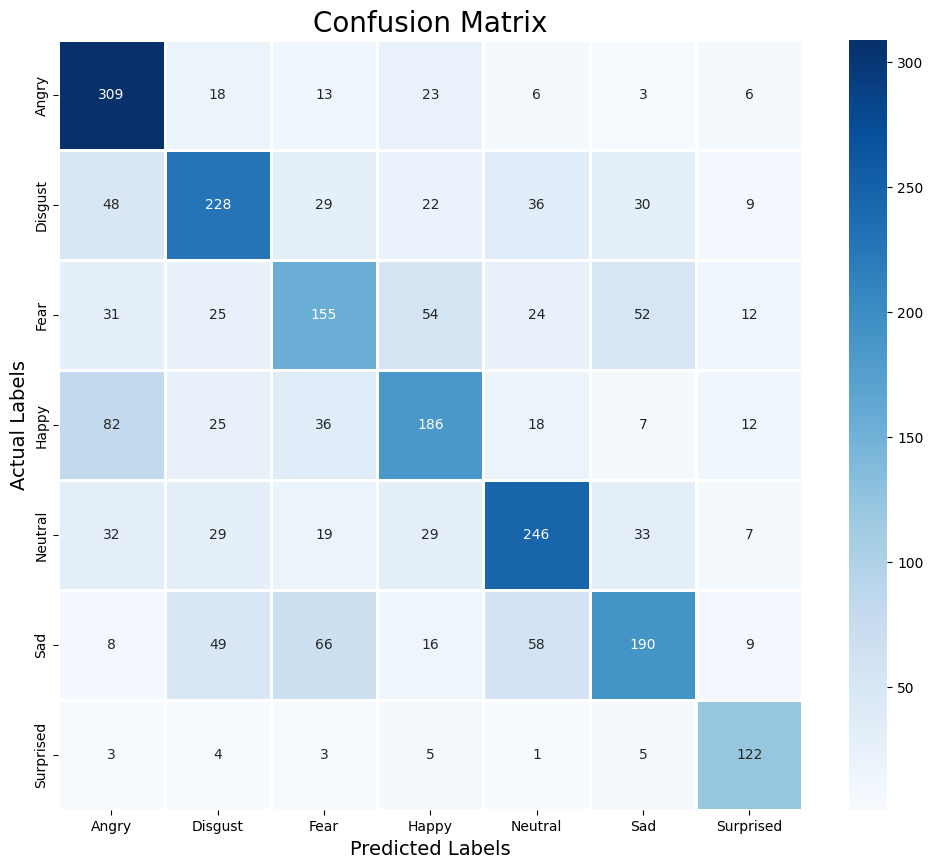

0.5902178380600083


In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

y_pred = model.predict([X_test_img, X_test_tab])
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
y_pred_mapped = [translation[label] for label in y_pred_labels]
y_test_mapped = [translation[label] for label in y_test_labels]

# Compute confusion matrix with readable labels
cm = confusion_matrix(y_test_mapped, y_pred_mapped)

# Convert the confusion matrix to a DataFrame for better visualization with readable labels
cm_df = pd.DataFrame(cm, index=list(translation.values()), columns=list(translation.values()))

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linecolor='white', linewidths=1)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(accuracy_score(y_pred_labels, y_test_labels))